In [2]:
import tensorflow as tf
import numpy as np
from mpl_toolkits import mplot3d
from d2l import tensorflow as d2l

# 5.1 Optimization and Estimation

- Although optimization provides a way to minimize the loss function for deep learning, in essence, the goals of optimization and machine learning are fundamentally different. The former is primarily concerned with minimizing an objective whereas the latter is concerned with finding a suitable model to estimate the real distribution, given a finite amount of data. In later lecture, we will discuss the difference between these two goals in a more specific manner. For instance, training error and generalization error generally differ: since the objective function of the optimization algorithm is usually a loss function based on the training dataset, the goal of optimization is to reduce the training error. However, the goal of statistical inference (and thus of machine learning) is to reduce the generalization error. To accomplish the latter we need to pay attention to overfitting in addition to using the optimization algorithm to reduce the training error. 

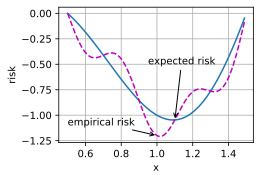

In [3]:
def f(x): 
    return x * tf.cos(np.pi * x)
def g(x): 
    return f(x) + 0.2 * tf.cos(5 * np.pi * x)
def annotate(text, xy, xytext):  #@save
    d2l.plt.gca().annotate(text, xy=xy, xytext=xytext,
                           arrowprops=dict(arrowstyle='->'))

x = tf.range(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('empirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('expected risk', (1.1, -1.05), (0.95, -0.5))

# 5.2 Optimization Challenges in Deep Learning

- In this section, we are going to focus specifically on the performance of the optimization algorithm in minimizing the objective function, rather than a model’s generalization error. In machine learning, most objective functions are complicated and do not have analytical solutions. Instead, we must use numerical optimization algorithms. The optimization algorithms below all fall into this category.

- There are many challenges in deep learning optimization. Some of the most vexing ones are local minima, saddle points and vanishing gradients. Let us have a look at a few of them.

## 5.2.1 Local Minima

- For the objective function  $f(x)$ , if the value of  $f(x)$  at  $x$  is smaller than the values of  $f(x)$  at any other points in the vicinity of $x$, then  $f(x)$  could be a local minimum. If the value of  $f(x)$  at  $x$  is the minimum of the objective function over the entire domain, then $f(x)$  is the global minimum.

- For example, given the function

$$f(x)=x\cdot\cos(\pi x) \text{ for } −1 \leq x \leq 2$$
 
we can approximate the local minimum and global minimum of this function.

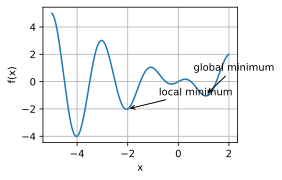

In [6]:
x = tf.range(-5.0, 2.0, 0.01)
d2l.plot(x, [f(x), ], 'x', 'f(x)')
annotate('local minimum', (-2, -2), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))